# Plotting PXRD patterns

This notebook contains a quick example of PXRD plotting from a cif file, using the matador API directly. The `pxrd_calculator` script bundled with matador may be a more useful entry point.

Try pasting in a cif file below, replacing the `cif_string` variable. I chose a difficult example with partial occupancy, to make sure it worked at all... in this case it is assuming random ordering and simply attenuating the intensity of a site by its occupancy.

In [2]:
from matador.scrapers import cif2dict
from matador.crystal import Crystal

In [3]:
cif_string = """
#(C) 2018 by FIZ Karlsruhe - Leibniz Institute for Information Infrastructure.  All rights reserved.
data_154384-ICSD
_database_code_ICSD 154384
_audit_creation_date 2007-04-01
_audit_update_record 2011-02-01
_chemical_name_systematic 'Silver bismuth iodide (0.83/1/4)'
_chemical_formula_structural 'Ag0.828 Bi I4'
_chemical_formula_sum 'Ag0.828 Bi1 I4'
_chemical_name_structure_type Ag1-xBiI4
_exptl_crystal_density_diffrn 5.86
_cell_measurement_temperature 300.
_publ_section_title

;
Solvothermale Synthese und Bestimmung der Kristallstrukturen von Ag Bi I4 und
Ag3 Bi I6
;
loop_
_citation_id
_citation_journal_full
_citation_year
_citation_journal_volume
_citation_page_first
_citation_page_last
_citation_journal_id_ASTM
primary 'Zeitschrift fuer Anorganische und Allgemeine Chemie (1950) (DE)' 2005
631 677 682 ZAACAB
loop_
_publ_author_name
'Oldag, T.'
'Aussieker, T.'
'Keller, H.L.'
'Preitschaft, C.'
'Pfitzner, A.'
_cell_length_a 12.2227(14)
_cell_length_b 12.2227(14)
_cell_length_c 12.2227(14)
_cell_angle_alpha 90.
_cell_angle_beta 90.
_cell_angle_gamma 90.
_cell_volume 1826.
_cell_formula_units_Z 8
_symmetry_space_group_name_H-M 'F d -3 m Z'
_symmetry_Int_Tables_number 227
_refine_ls_R_factor_all 0.0151
loop_
_symmetry_equiv_pos_site_id
_symmetry_equiv_pos_as_xyz
1 '-z, y+3/4, x+3/4'
2 'z+3/4, -y, x+3/4'
3 'z+3/4, y+3/4, -x'
4 '-z, -y, -x'
5 'y+3/4, x+3/4, -z'
6 '-y, x+3/4, z+3/4'
7 'y+3/4, -x, z+3/4'
8 '-y, -x, -z'
9 'x+3/4, -z, y+3/4'
10 'x+3/4, z+3/4, -y'
11 '-x, z+3/4, y+3/4'
12 '-x, -z, -y'
13 '-z, x+3/4, y+3/4'
14 'z+3/4, x+3/4, -y'
15 'z+3/4, -x, y+3/4'
16 '-z, -x, -y'
17 'y+3/4, -z, x+3/4'
18 '-y, z+3/4, x+3/4'
19 'y+3/4, z+3/4, -x'
20 '-y, -z, -x'
21 'x+3/4, y+3/4, -z'
22 'x+3/4, -y, z+3/4'
23 '-x, y+3/4, z+3/4'
24 '-x, -y, -z'
25 'z, -y+1/4, -x+1/4'
26 '-z+1/4, y, -x+1/4'
27 '-z+1/4, -y+1/4, x'
28 'z, y, x'
29 '-y+1/4, -x+1/4, z'
30 'y, -x+1/4, -z+1/4'
31 '-y+1/4, x, -z+1/4'
32 'y, x, z'
33 '-x+1/4, z, -y+1/4'
34 '-x+1/4, -z+1/4, y'
35 'x, -z+1/4, -y+1/4'
36 'x, z, y'
37 'z, -x+1/4, -y+1/4'
38 '-z+1/4, -x+1/4, y'
39 '-z+1/4, x, -y+1/4'
40 'z, x, y'
41 '-y+1/4, z, -x+1/4'
42 'y, -z+1/4, -x+1/4'
43 '-y+1/4, -z+1/4, x'
44 'y, z, x'
45 '-x+1/4, -y+1/4, z'
46 '-x+1/4, y, -z+1/4'
47 'x, -y+1/4, -z+1/4'
48 'x, y, z'
49 '-z, y+1/4, x+1/4'
50 'z+3/4, -y+1/2, x+1/4'
51 'z+3/4, y+1/4, -x+1/2'
52 '-z, -y+1/2, -x+1/2'
53 'y+3/4, x+1/4, -z+1/2'
54 '-y, x+1/4, z+1/4'
55 'y+3/4, -x+1/2, z+1/4'
56 '-y, -x+1/2, -z+1/2'
57 'x+3/4, -z+1/2, y+1/4'
58 'x+3/4, z+1/4, -y+1/2'
59 '-x, z+1/4, y+1/4'
60 '-x, -z+1/2, -y+1/2'
61 '-z, x+1/4, y+1/4'
62 'z+3/4, x+1/4, -y+1/2'
63 'z+3/4, -x+1/2, y+1/4'
64 '-z, -x+1/2, -y+1/2'
65 'y+3/4, -z+1/2, x+1/4'
66 '-y, z+1/4, x+1/4'
67 'y+3/4, z+1/4, -x+1/2'
68 '-y, -z+1/2, -x+1/2'
69 'x+3/4, y+1/4, -z+1/2'
70 'x+3/4, -y+1/2, z+1/4'
71 '-x, y+1/4, z+1/4'
72 '-x, -y+1/2, -z+1/2'
73 'z, -y+3/4, -x+3/4'
74 '-z+1/4, y+1/2, -x+3/4'
75 '-z+1/4, -y+3/4, x+1/2'
76 'z, y+1/2, x+1/2'
77 '-y+1/4, -x+3/4, z+1/2'
78 'y, -x+3/4, -z+3/4'
79 '-y+1/4, x+1/2, -z+3/4'
80 'y, x+1/2, z+1/2'
81 '-x+1/4, z+1/2, -y+3/4'
82 '-x+1/4, -z+3/4, y+1/2'
83 'x, -z+3/4, -y+3/4'
84 'x, z+1/2, y+1/2'
85 'z, -x+3/4, -y+3/4'
86 '-z+1/4, -x+3/4, y+1/2'
87 '-z+1/4, x+1/2, -y+3/4'
88 'z, x+1/2, y+1/2'
89 '-y+1/4, z+1/2, -x+3/4'
90 'y, -z+3/4, -x+3/4'
91 '-y+1/4, -z+3/4, x+1/2'
92 'y, z+1/2, x+1/2'
93 '-x+1/4, -y+3/4, z+1/2'
94 '-x+1/4, y+1/2, -z+3/4'
95 'x, -y+3/4, -z+3/4'
96 'x, y+1/2, z+1/2'
97 '-z+1/2, y+3/4, x+1/4'
98 'z+1/4, -y, x+1/4'
99 'z+1/4, y+3/4, -x+1/2'
100 '-z+1/2, -y, -x+1/2'
101 'y+1/4, x+3/4, -z+1/2'
102 '-y+1/2, x+3/4, z+1/4'
103 'y+1/4, -x, z+1/4'
104 '-y+1/2, -x, -z+1/2'
105 'x+1/4, -z, y+1/4'
106 'x+1/4, z+3/4, -y+1/2'
107 '-x+1/2, z+3/4, y+1/4'
108 '-x+1/2, -z, -y+1/2'
109 '-z+1/2, x+3/4, y+1/4'
110 'z+1/4, x+3/4, -y+1/2'
111 'z+1/4, -x, y+1/4'
112 '-z+1/2, -x, -y+1/2'
113 'y+1/4, -z, x+1/4'
114 '-y+1/2, z+3/4, x+1/4'
115 'y+1/4, z+3/4, -x+1/2'
116 '-y+1/2, -z, -x+1/2'
117 'x+1/4, y+3/4, -z+1/2'
118 'x+1/4, -y, z+1/4'
119 '-x+1/2, y+3/4, z+1/4'
120 '-x+1/2, -y, -z+1/2'
121 'z+1/2, -y+1/4, -x+3/4'
122 '-z+3/4, y, -x+3/4'
123 '-z+3/4, -y+1/4, x+1/2'
124 'z+1/2, y, x+1/2'
125 '-y+3/4, -x+1/4, z+1/2'
126 'y+1/2, -x+1/4, -z+3/4'
127 '-y+3/4, x, -z+3/4'
128 'y+1/2, x, z+1/2'
129 '-x+3/4, z, -y+3/4'
130 '-x+3/4, -z+1/4, y+1/2'
131 'x+1/2, -z+1/4, -y+3/4'
132 'x+1/2, z, y+1/2'
133 'z+1/2, -x+1/4, -y+3/4'
134 '-z+3/4, -x+1/4, y+1/2'
135 '-z+3/4, x, -y+3/4'
136 'z+1/2, x, y+1/2'
137 '-y+3/4, z, -x+3/4'
138 'y+1/2, -z+1/4, -x+3/4'
139 '-y+3/4, -z+1/4, x+1/2'
140 'y+1/2, z, x+1/2'
141 '-x+3/4, -y+1/4, z+1/2'
142 '-x+3/4, y, -z+3/4'
143 'x+1/2, -y+1/4, -z+3/4'
144 'x+1/2, y, z+1/2'
145 '-z+1/2, y+1/4, x+3/4'
146 'z+1/4, -y+1/2, x+3/4'
147 'z+1/4, y+1/4, -x'
148 '-z+1/2, -y+1/2, -x'
149 'y+1/4, x+1/4, -z'
150 '-y+1/2, x+1/4, z+3/4'
151 'y+1/4, -x+1/2, z+3/4'
152 '-y+1/2, -x+1/2, -z'
153 'x+1/4, -z+1/2, y+3/4'
154 'x+1/4, z+1/4, -y'
155 '-x+1/2, z+1/4, y+3/4'
156 '-x+1/2, -z+1/2, -y'
157 '-z+1/2, x+1/4, y+3/4'
158 'z+1/4, x+1/4, -y'
159 'z+1/4, -x+1/2, y+3/4'
160 '-z+1/2, -x+1/2, -y'
161 'y+1/4, -z+1/2, x+3/4'
162 '-y+1/2, z+1/4, x+3/4'
163 'y+1/4, z+1/4, -x'
164 '-y+1/2, -z+1/2, -x'
165 'x+1/4, y+1/4, -z'
166 'x+1/4, -y+1/2, z+3/4'
167 '-x+1/2, y+1/4, z+3/4'
168 '-x+1/2, -y+1/2, -z'
169 'z+1/2, -y+3/4, -x+1/4'
170 '-z+3/4, y+1/2, -x+1/4'
171 '-z+3/4, -y+3/4, x'
172 'z+1/2, y+1/2, x'
173 '-y+3/4, -x+3/4, z'
174 'y+1/2, -x+3/4, -z+1/4'
175 '-y+3/4, x+1/2, -z+1/4'
176 'y+1/2, x+1/2, z'
177 '-x+3/4, z+1/2, -y+1/4'
178 '-x+3/4, -z+3/4, y'
179 'x+1/2, -z+3/4, -y+1/4'
180 'x+1/2, z+1/2, y'
181 'z+1/2, -x+3/4, -y+1/4'
182 '-z+3/4, -x+3/4, y'
183 '-z+3/4, x+1/2, -y+1/4'
184 'z+1/2, x+1/2, y'
185 '-y+3/4, z+1/2, -x+1/4'
186 'y+1/2, -z+3/4, -x+1/4'
187 '-y+3/4, -z+3/4, x'
188 'y+1/2, z+1/2, x'
189 '-x+3/4, -y+3/4, z'
190 '-x+3/4, y+1/2, -z+1/4'
191 'x+1/2, -y+3/4, -z+1/4'
192 'x+1/2, y+1/2, z'
loop_
_atom_type_symbol
_atom_type_oxidation_number
Bi3+ 3.172
Ag1+ 1
I1- -1
loop_
_atom_site_label
_atom_site_type_symbol
_atom_site_symmetry_multiplicity
_atom_site_Wyckoff_symbol
_atom_site_fract_x
_atom_site_fract_y
_atom_site_fract_z
_atom_site_B_iso_or_equiv
_atom_site_occupancy
_atom_site_attached_hydrogens
Bi1 Bi3+ 16 c 0 0 0 0.0486(2) 0.5 0
Ag1 Ag1+ 16 c 0 0 0 0.0486(2) 0.414(3) 0
I1 I1- 32 e 0.25279(2) 0.25279(2) 0.25279(2) 0.03399(15) 1 0
loop_
_atom_site_aniso_label
_atom_site_aniso_type_symbol
_atom_site_aniso_U_11
_atom_site_aniso_U_22
_atom_site_aniso_U_33
_atom_site_aniso_U_12
_atom_site_aniso_U_13
_atom_site_aniso_U_23
Bi1 Bi3+ 0.0486(2) 0.0486(2) 0.0486(2) -0.0079(2) -0.0079(2) -0.0079(2)
Ag1 Ag1+ 0.0486(2) 0.0486(2) 0.0486(2) -0.0079(2) -0.0079(2) -0.0079(2)
I1 I1- 0.03399(15) 0.03399(15) 0.03399(15) -0.0001(3) -0.0001(3) -0.0001(3)
#End of TTdata_154384-ICSD%   
"""

In [4]:
with open("test.cif", "w") as f:
    f.write(cif_string)

In [5]:
crystal = Crystal(cif2dict("test.cif")[0])

System has partial occupancy, not refining with spglib.


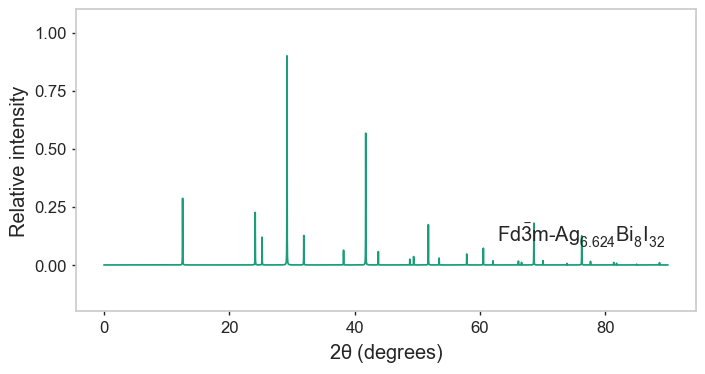

In [6]:
# plot with default settings
crystal.pxrd.plot()

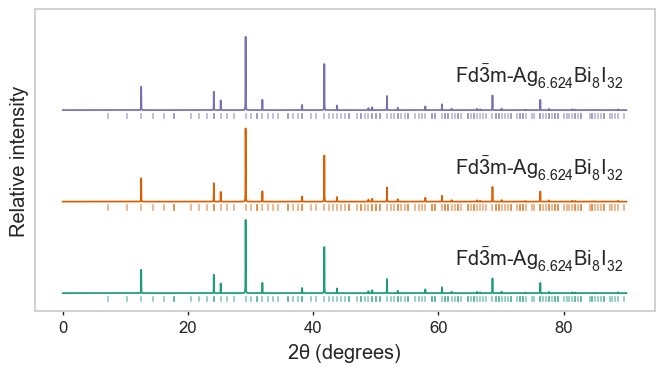

In [7]:
# plot with full function that can control all settings and plot multiple phases
from matador.plotting import plot_pxrd
plot_pxrd(
    [crystal.pxrd, crystal.pxrd, crystal.pxrd],
    rug=True,
    text_offset=0.3,
)

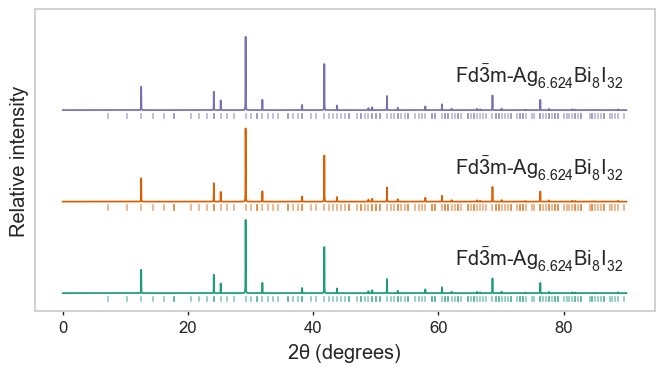

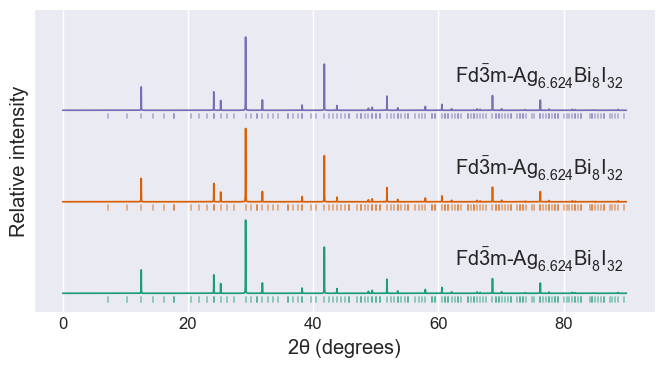

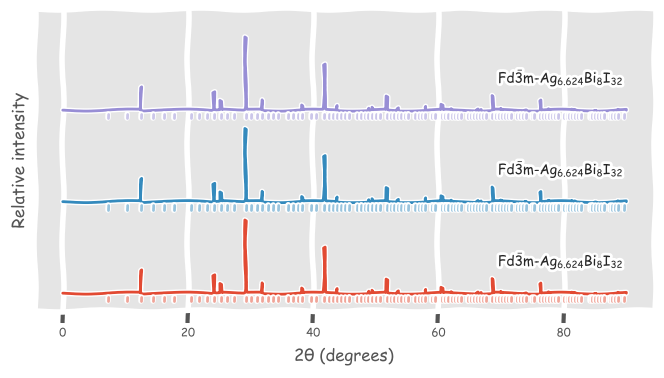

In [8]:
# can also tweak the plot style by specifying a matplotlib style/ style file
from matador.config import set_settings
set_settings({"plotting": {"default_style": "matador"}})
plot_pxrd(
    [crystal.pxrd, crystal.pxrd, crystal.pxrd],
    rug=True,
    text_offset=0.3,
)
set_settings({"plotting": {"default_style": "seaborn-darkgrid"}})
plot_pxrd(
    [crystal.pxrd, crystal.pxrd, crystal.pxrd],
    rug=True,
    text_offset=0.3,
)
set_settings({"plotting": {"default_style": "ggplot"}})
import matplotlib.pyplot as plt
plt.xkcd()
plot_pxrd(
    [crystal.pxrd, crystal.pxrd, crystal.pxrd],
    rug=True,
    text_offset=0.3,
)

In [9]:
# print the peaks and planes that generated the particular peaks, with no grouping
print(" 2θ         <hkl>")
for peak, hkl in zip(crystal.pxrd.peak_positions, crystal.pxrd.hkls):
    hkl_str = ' '.join(["{: d}".format(int(ind)) for ind in hkl])
    print(f"{peak:1.3f}\t {hkl_str}")

 2θ         <hkl>
7.227	  0  1  0
7.227	  0  0  1
7.227	  0  0 -1
7.227	 -1  0  0
7.227	  0 -1  0
7.227	  1  0  0
10.227	  1  0 -1
10.227	 -1  0  1
10.227	 -1  1  0
10.227	  0 -1 -1
10.227	 -1 -1  0
10.227	  0 -1  1
10.227	  0  1 -1
10.227	  1  1  0
10.227	  0  1  1
10.227	  1  0  1
10.227	  1 -1  0
10.227	 -1  0 -1
12.533	  1 -1 -1
12.533	 -1 -1  1
12.533	  1 -1  1
12.533	 -1  1 -1
12.533	 -1  1  1
12.533	  1  1 -1
12.533	 -1 -1 -1
12.533	  1  1  1
14.482	  0  0 -2
14.482	  0 -2  0
14.482	 -2  0  0
14.482	  0  2  0
14.482	  2  0  0
14.482	  0  0  2
16.202	 -2 -1  0
16.202	 -2  0  1
16.202	 -2  0 -1
16.202	  2  0 -1
16.202	  1  0  2
16.202	  1 -2  0
16.202	  2  0  1
16.202	  0  2  1
16.202	 -1  2  0
16.202	  1  0 -2
16.202	  2  1  0
16.202	  0  2 -1
16.202	  0  1  2
16.202	  0 -2  1
16.202	  2 -1  0
16.202	 -1  0  2
16.202	 -1  0 -2
16.202	  1  2  0
16.202	  0 -2 -1
16.202	 -1 -2  0
16.202	  0 -1  2
16.202	  0  1 -2
16.202	 -2  1  0
16.202	  0 -1 -2
17.761	 -1  1 -2
17.761	  1 -1 -2
17

72.961	 -8 -3  4
72.961	  6  2  7
72.961	  3  4  8
72.961	 -8 -4  3
72.961	  4  8 -3
72.961	 -4 -3  8
72.961	 -3  4 -8
72.961	  7  2 -6
72.961	  3 -4 -8
72.961	 -8  5  0
72.961	  6 -7  2
72.961	  5 -8  0
72.961	  0  8  5
72.961	 -8 -3 -4
72.961	  8 -4 -3
72.961	  7 -2  6
72.961	  6  7 -2
72.961	 -4  3  8
72.961	  5  0  8
72.961	 -4 -8  3
72.961	 -7 -6 -2
72.961	  2 -6  7
72.961	  6 -2 -7
72.961	  8  5  0
72.961	  2  7  6
72.961	 -2 -6  7
72.961	  3  8 -4
72.961	 -7 -2 -6
72.961	 -8  4 -3
72.961	 -8  0 -5
72.961	  8 -3  4
72.961	  2  6 -7
72.961	 -7  6  2
72.961	 -8 -4 -3
72.961	 -3  8 -4
72.961	 -2 -7 -6
72.961	  2 -7 -6
72.961	  2  7 -6
72.961	  4  3  8
72.961	  7  6 -2
72.961	  4 -8  3
72.961	  2 -6 -7
72.961	 -5 -8  0
72.961	  0 -8  5
72.961	 -4 -8 -3
72.961	  3  8  4
72.961	 -8 -5  0
72.961	 -7 -2  6
72.961	  2  6  7
72.961	  5  8  0
72.961	  4  3 -8
72.961	  2 -7  6
72.961	  7 -6 -2
72.961	 -2 -7  6
72.961	  3 -8  4
72.961	  5  0 -8
72.961	 -4 -3 -8
72.961	 -3  8  4
72.961	 -4  8 

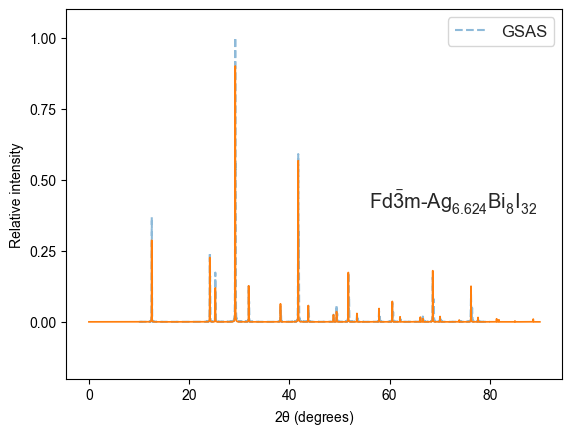

In [10]:
# match with GSAS for my particular example phase
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
set_settings({"plotting": {"default_style": "matador"}})
import numpy as np
gsas_data = "./cif_test.txt"
gsas = np.loadtxt(gsas_data, skiprows=1)
fig, ax = plt.subplots() 
plt.plot(gsas[:, 0], gsas[:, 1] / np.max(gsas[:, 1]), ls='--', label='GSAS', alpha=0.5)
plot_pxrd(crystal.pxrd, ax=ax, text_offset=0.4, alpha=0.5)
plt.legend();